##Imports

In [ ]:
# Normal imports
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Reading and storing the data

In [ ]:
# Downloading the two csv files from Hope Neveux's public Data Capping repo
!wget https://raw.githubusercontent.com/h-nev/Data-Capping-477/master/Fake.csv
!wget https://raw.githubusercontent.com/h-nev/Data-Capping-477/master/True.csv

--2022-04-28 02:01:11--  https://raw.githubusercontent.com/h-nev/Data-Capping-477/master/Fake.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62789876 (60M) [text/plain]
Saving to: ‘Fake.csv’

Fake.csv            100%[===================>]  59.88M   121MB/s    in 0.5s    

2022-04-28 02:01:12 (121 MB/s) - ‘Fake.csv’ saved [62789876/62789876]

--2022-04-28 02:01:12--  https://raw.githubusercontent.com/h-nev/Data-Capping-477/master/True.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53561522 (51M) [text/plain]
Saving to: ‘T

In [ ]:
# Checking the directory to make sure the data we expect is there
!ls -lia

total 113644
2097188 drwxr-xr-x 1 root root     4096 Apr 28 02:01 .
3146784 drwxr-xr-x 1 root root     4096 Apr 28 02:00 ..
4063259 drwxr-xr-x 4 root root     4096 Apr 25 13:45 .config
3146795 -rw-r--r-- 1 root root 62789876 Apr 28 02:01 Fake.csv
2097189 drwxr-xr-x 1 root root     4096 Apr 25 13:46 sample_data
3146797 -rw-r--r-- 1 root root 53561522 Apr 28 02:01 True.csv


In [ ]:
# Reading in the fake news data set and setting Fake as 0
df1 = pd.read_csv("Fake.csv")
df1['target'] = 0
df1.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
# Reading in the true data set and setting True as 1
df2 = pd.read_csv("True.csv")
df2['target'] = 1
df2.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
# Combining the two dataframes into one while redoing the indices
dfs = [df1, df2]
news = pd.concat(dfs, ignore_index = True)
news

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
# Checking the shape of the Fake news set, the True news set, and the combinded set
df1.shape, df2.shape, news.shape

((23481, 5), (21417, 5), (44898, 5))

In [ ]:
# Checking for null values 
news.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


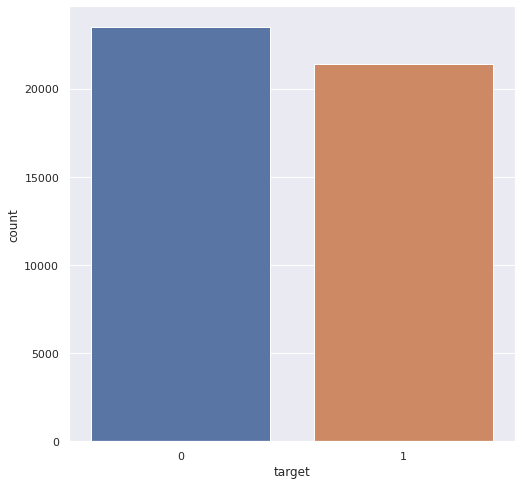

In [ ]:
# Fake vs Real ORIGINAL
sns.set(rc = {"figure.figsize":(8, 8)}) 
sns.color_palette("coolwarm", as_cmap = True) 
plt = sns.countplot(news.loc[:,'target']) 
plt

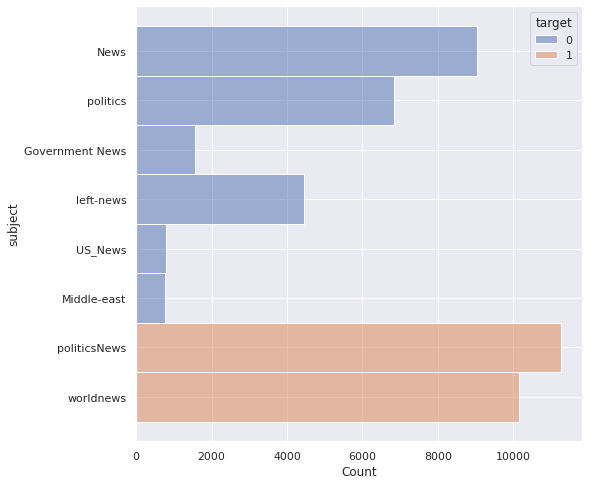

In [ ]:
# Overall subject distribution ORIGINAL
sns.set(rc={"figure.figsize":(8, 8)}) 
plt = sns.histplot(data = news, y = 'subject', hue = 'target') 
plt 

AFTER THE FACT: Is there something we overlooked that's making the model less universal than we want it to be?

In [ ]:
# Are there duplicates?
news.loc[:, 'text'].shape[0] - news.loc[:, 'text'].unique().shape[0]

6252

In [ ]:
news = news.drop_duplicates(subset = 'text', keep = 'first')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


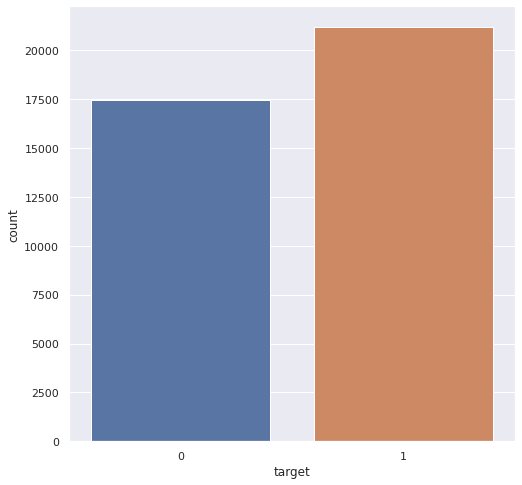

In [ ]:
sns.set(rc = {"figure.figsize":(8, 8)}) 
sns.color_palette("coolwarm", as_cmap = True) 
plt = sns.countplot(news.loc[:,'target']) 
plt

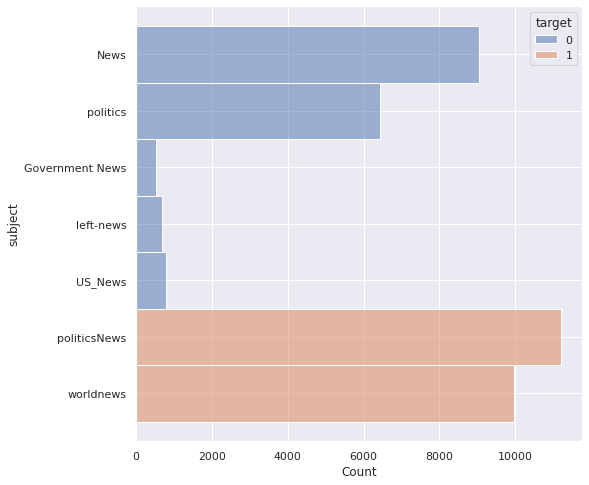

In [ ]:
sns.set(rc={"figure.figsize":(8, 8)}) 
plt = sns.histplot(data = news, y = 'subject', hue = 'target') 
plt 

##Downloading All the Other Data 

In [ ]:
# Downloading a bunch of other csv data to test out our models
!wget https://raw.githubusercontent.com/h-nev/Data-Capping-477/master/CYBER-COP%20news.csv
!wget https://raw.githubusercontent.com/h-nev/Data-Capping-477/master/RUCHI-BHATIA%20news.csv

--2022-04-28 02:01:18--  https://raw.githubusercontent.com/h-nev/Data-Capping-477/master/CYBER-COP%20news.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30695372 (29M) [text/plain]
Saving to: ‘CYBER-COP news.csv’

CYBER-COP news.csv  100%[===================>]  29.27M   114MB/s    in 0.3s    

2022-04-28 02:01:19 (114 MB/s) - ‘CYBER-COP news.csv’ saved [30695372/30695372]

--2022-04-28 02:01:19--  https://raw.githubusercontent.com/h-nev/Data-Capping-477/master/RUCHI-BHATIA%20news.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

In [ ]:
# Checking the directory to make sure the data we expect is there
!ls -lia

total 154332
2097188 drwxr-xr-x 1 root root     4096 Apr 28 02:01  .
3146784 drwxr-xr-x 1 root root     4096 Apr 28 02:00  ..
4063259 drwxr-xr-x 4 root root     4096 Apr 25 13:45  .config
3146819 -rw-r--r-- 1 root root 30695372 Apr 28 02:01 'CYBER-COP news.csv'
3146795 -rw-r--r-- 1 root root 62789876 Apr 28 02:01  Fake.csv
3146820 -rw-r--r-- 1 root root 10967452 Apr 28 02:01 'RUCHI-BHATIA news.csv'
2097189 drwxr-xr-x 1 root root     4096 Apr 25 13:46  sample_data
3146797 -rw-r--r-- 1 root root 53561522 Apr 28 02:01  True.csv


In [ ]:
# Saving all the info and reading it to a pandas dataframe
cyber_cop = pd.read_csv("CYBER-COP news.csv")
ruchi_bhatia = pd.read_csv("RUCHI-BHATIA news.csv")

In [ ]:
# Checking each for nulls
print("CYBER COP:") 
print(cyber_cop.isnull().sum())

print("\nRUCHI BHATIA:")
print(ruchi_bhatia.isnull().sum())

CYBER COP:
Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

RUCHI BHATIA:
author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64


###CYBER COP Data Manipulation

In [ ]:
cyber_cop.head()

,Unnamed: 0,title,text,label
0,0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL
1,1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL
2,2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE
3,3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL
4,4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL


In [ ]:
# Are there duplciates here too?
cyber_cop.loc[:, 'text'].shape[0] - cyber_cop.loc[:, 'text'].unique().shape[0]

275

In [ ]:
# Removing the duplicates
cyber_cop = cyber_cop.drop_duplicates(subset = 'text', keep = 'first')

In [ ]:
cyber_X = cyber_cop.loc[:, 'text'] 
cyber_Y = cyber_cop.loc[:, 'label'] 

In [ ]:
# Need to figure out what the labels look like so we can recode them
cyber_Y.head()

0    REAL
1    REAL
2    FAKE
3    REAL
4    REAL
Name: label, dtype: object

In [ ]:
# Recoding and making sure it works
cyber_Y = cyber_Y.replace({'FAKE': 0, 'REAL': 1})
cyber_Y.head()

0    1
1    1
2    0
3    1
4    1
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


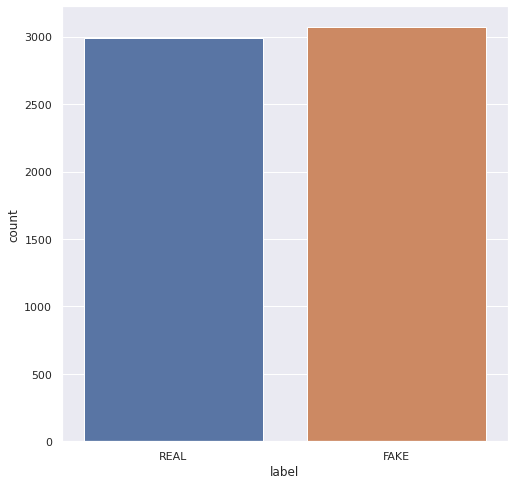

In [ ]:
sns.set(rc = {"figure.figsize":(8, 8)}) 
sns.color_palette("coolwarm", as_cmap = True) 
plt = sns.countplot(cyber_cop.loc[:,'label']) 
plt 

###RUCHI BHATIA Data Manipulation

In [ ]:
ruchi_bhatia.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [ ]:
ruchi_bhatia.loc[:, 'language'].unique()

array(['english', 'ignore', 'german', 'french', 'spanish', nan],
      dtype=object)

In [ ]:
# Remove all non-english news stories
ruchi_bhatia = ruchi_bhatia[ruchi_bhatia['language'] == 'english']

In [ ]:
# Dropping all NA's in the set
ruchi_bhatia = ruchi_bhatia.dropna(subset = ['text'])

In [ ]:
# Are there any duplicates in this set?
ruchi_bhatia.loc[:, 'text'].shape[0] - ruchi_bhatia.loc[:, 'text'].unique().shape[0]

109

In [ ]:
# Removing the duplicates
ruchi_bhatai = ruchi_bhatia.drop_duplicates(subset = 'text', keep = 'first')

In [ ]:
# Recoding to make it better
ruchi_X = ruchi_bhatia.loc[:, 'text'] 
ruchi_Y = ruchi_bhatia.loc[:, 'label'].replace({'Fake': 0, 'Real': 1})
ruchi_Y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
# Checkung for nulls
ruchi_bhatia.isnull().sum()

author                     0
published                  0
title                      0
text                       0
language                   0
site_url                   0
main_img_url               0
type                       0
label                      0
title_without_stopwords    1
text_without_stopwords     4
hasImage                   0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


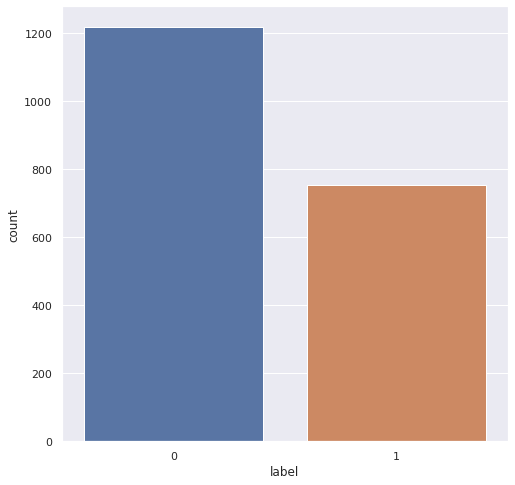

In [ ]:
sns.set(rc = {"figure.figsize":(8, 8)}) 
sns.color_palette("coolwarm", as_cmap = True) 
plt = sns.countplot(ruchi_Y) 
plt 

##Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split 

# Splitting by target and text
news_X = news.loc[:, 'text'] 
news_Y = news.loc[:, 'target'] 

X_train, X_test, y_train, y_test = train_test_split(news_X, news_Y, test_size = 0.30, random_state = 42) 

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27052,), (11594,), (27052,), (11594,))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


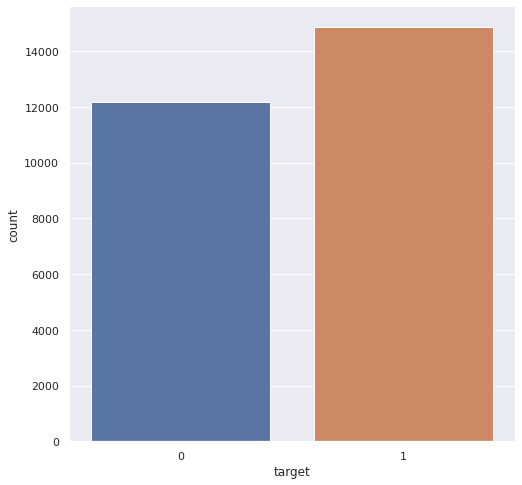

In [ ]:
# Target distribution check -- Training
sns.set(rc = {"figure.figsize":(8, 8)}) 
sns.color_palette("coolwarm", as_cmap = True) 
plt = sns.countplot(y_train) 
plt 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


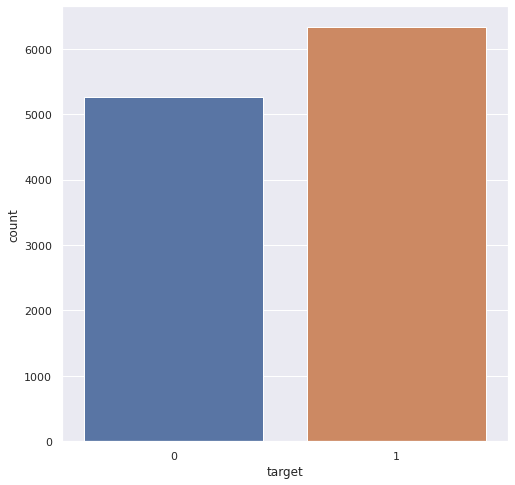

In [ ]:
# Target distribution check -- Test
sns.set(rc = {"figure.figsize":(8, 8)}) 
sns.color_palette("coolwarm", as_cmap = True) 
plt = sns.countplot(y_test) 
plt 

##Multinomial Naive Bayes

In [ ]:
# Create token pattern
import re

re_tok = re.compile('[^a-zA-Z]')
def tokenize(s): 
    return re_tok.sub(' ', s).split()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(tokenizer = tokenize)

In [ ]:
# Transforms text in X to a bag of words representation
tf_train = count_vect.fit_transform(X_train)
tf_test = count_vect.transform(X_test)

In [ ]:
# Get full vocabulary from X
vocab = count_vect.get_feature_names()
len(vocab)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


97190

In [ ]:
# Run multinomial NB on text data set
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(tf_train, y_train)

In [ ]:
probs = model.predict_proba(tf_test)[:,1]
predictions = model.predict(tf_test)



Accuracy.........: 95.3165
Precision........: 95.6460
Recall...........: 95.7820
FP Rate...........: 5.2432




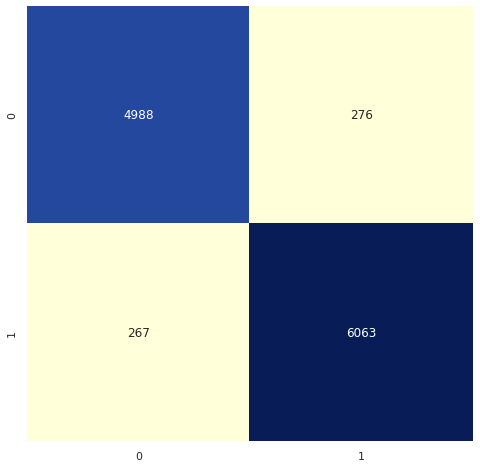

In [ ]:
# Performance Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
specificity = recall_score(y_test, predictions, pos_label = 0)

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision * 100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate...........: {(1-specificity) * 100:.4f}")
print("\n")

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False, cmap = "YlGnBu");



Accuracy.........: 56.6667
Precision........: 61.4079
Recall...........: 32.6865
FP Rate...........: 19.9935




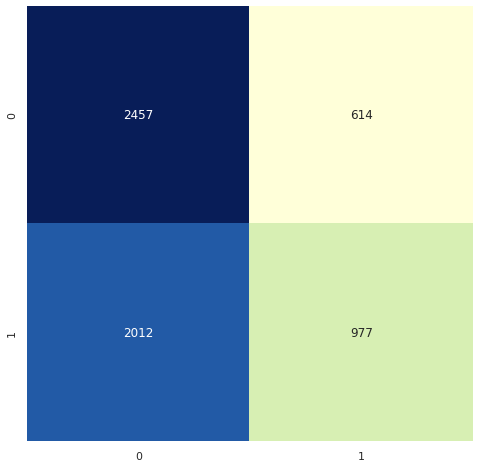

In [ ]:
# Running CYBER COP data through the model
cyber_test = count_vect.transform(cyber_X)
new_pred1 = model.predict(cyber_test)

accuracy = accuracy_score(cyber_Y, new_pred1)
precision = precision_score(cyber_Y, new_pred1)
recall = recall_score(cyber_Y, new_pred1)
specificity = recall_score(cyber_Y, new_pred1, pos_label = 0)

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision * 100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate...........: {(1-specificity) * 100:.4f}")
print("\n")

cm = confusion_matrix(cyber_Y, new_pred1)
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False, cmap = "YlGnBu");

Cyber Cop was a perfectly balanced data set, and yet the model did horribly using this data it had never seen before. There were no null values, and overall it had a usability rating of 2.35. We may attribute this to the low usability, but clearly this model isn't as flexible as it should be just from this one real world test.



Accuracy.........: 59.8377
Precision........: 44.9735
Recall...........: 22.5464
FP Rate...........: 17.0772




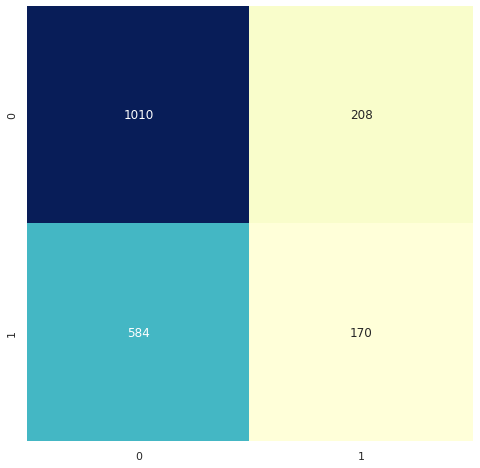

In [ ]:
# Running RUCHI BHATIA data through the model
ruchi_test = count_vect.transform(ruchi_X)
new_pred2 = model.predict(ruchi_test)

accuracy = accuracy_score(ruchi_Y, new_pred2)
precision = precision_score(ruchi_Y, new_pred2)
recall = recall_score(ruchi_Y, new_pred2)
specificity = recall_score(ruchi_Y, new_pred2, pos_label = 0)

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision * 100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate...........: {(1-specificity) * 100:.4f}")
print("\n")

cm = confusion_matrix(ruchi_Y, new_pred2)
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False, cmap = "YlGnBu");

##SVM

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer(tokenizer=tokenize)),
                     ('clf', LinearSVC()),])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train) 

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function tokenize at 0x7f54b034a560>)),
                ('clf', LinearSVC())])

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)



Accuracy.........: 99.3617
Precision........: 99.2443
Recall...........: 99.5893
FP Rate...........: 0.9119




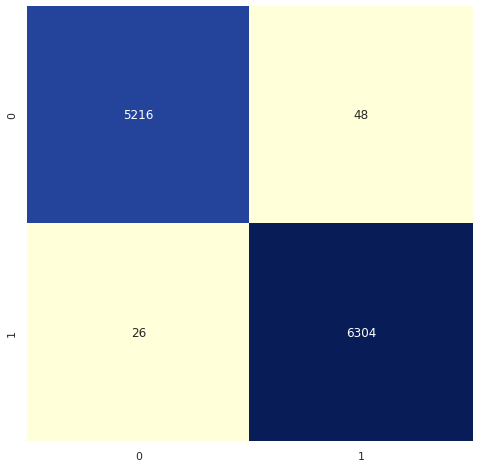

In [ ]:
# Performance metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
specificity = recall_score(y_test, predictions, pos_label = 0)

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision * 100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate...........: {(1-specificity) * 100:.4f}")
print("\n")

# Report the confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False, cmap = "YlGnBu");



Accuracy.........: 59.3234
Precision........: 77.3486
Recall...........: 24.7909
FP Rate...........: 7.0661




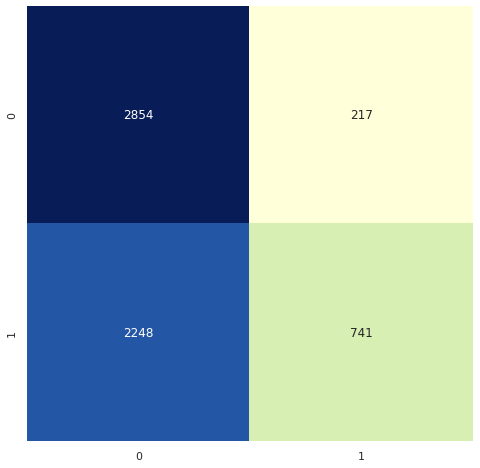

In [ ]:
# Running on the CYBER COP data
cyber_pred = text_clf.predict(cyber_X)

# Performance metrics
accuracy = accuracy_score(cyber_Y, cyber_pred)
precision = precision_score(cyber_Y, cyber_pred)
recall = recall_score(cyber_Y, cyber_pred)
specificity = recall_score(cyber_Y, cyber_pred, pos_label = 0)

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision * 100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate...........: {(1-specificity) * 100:.4f}")
print("\n")

#Report the confusion matrix
cm = confusion_matrix(cyber_Y, cyber_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False, cmap = "YlGnBu");



Accuracy.........: 62.0183
Precision........: 51.7241
Recall...........: 9.9469
FP Rate...........: 5.7471




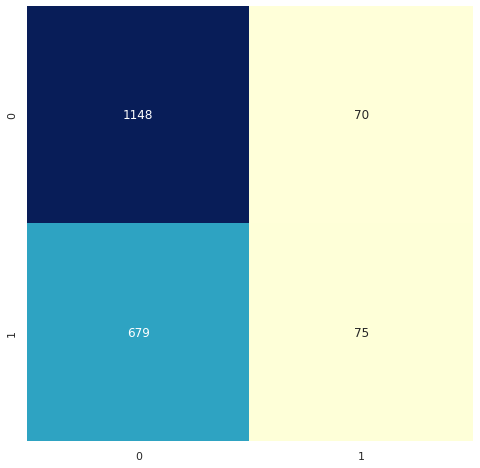

In [ ]:
# Running on the RUCHI BHATIA data
ruchi_pred = text_clf.predict(ruchi_X)

# Performance metrics
accuracy = accuracy_score(ruchi_Y, ruchi_pred)
precision = precision_score(ruchi_Y, ruchi_pred)
recall = recall_score(ruchi_Y, ruchi_pred)
specificity = recall_score(ruchi_Y, ruchi_pred, pos_label = 0)

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision * 100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate...........: {(1-specificity) * 100:.4f}")
print("\n")

# Report the confusion matrix
cm = confusion_matrix(ruchi_Y, ruchi_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False, cmap = "YlGnBu");

Cyber Cop was a perfectly balanced data set, and yet the model did horribly using this data it had never seen before. There were no null values, and overall it had a usability rating of 2.35. We may attribute this to the low usability, but clearly this model isn't as flexible as it should be just from this one real world test.

Once again, this model despite doing very well originally cannot handle this data set, though it performs slightly better than our last model.

###SVM with Tuned Margin

In [ ]:
# Hand-designed parameter tuning for margin only
from scipy.stats.stats import ModeResult
from sklearn.model_selection import GridSearchCV

# C parameter softening the margin
margins = [1, 5, 10, 15, 20]

# Storing all the best predcition, accuracy, and model found below
best_pred = 0
best_acc = 0
best_model = 0

for i in margins:
  text_clf = Pipeline([('tfidf', TfidfVectorizer(tokenizer=tokenize)),
                     ('clf', LinearSVC(C = i)),])
  model = text_clf.fit(X_train, y_train)
  pred = text_clf.predict(X_test)

  this_acc = accuracy_score(y_test, pred)
  print('C = ', i)
  print(this_acc)

  if this_acc > best_acc:
    best_acc = this_acc
    best_pred = pred
    best_model = model

C =  1
0.9936173883042954
C =  5
0.9942211488701053
C =  10
0.9941348973607038
C =  15
0.9941348973607038
C =  20
0.9940486458513024


In [ ]:
# Printing out the model with the best configuration that produces the best accuracy
print(best_model)
print(best_acc)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function tokenize at 0x7f54b034a560>)),
                ('clf', LinearSVC(C=5))])
0.9942211488701053




Accuracy.........: 99.4221
Precision........: 99.2762
Recall...........: 99.6682
FP Rate...........: 0.8739




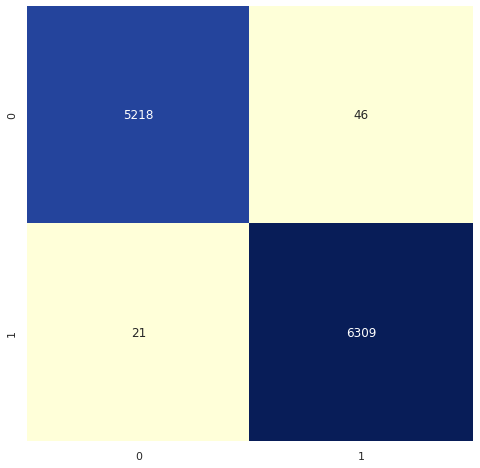

In [ ]:
# Performance metrics
accuracy = accuracy_score(y_test, best_pred)
precision = precision_score(y_test, best_pred)
recall = recall_score(y_test, best_pred)
specificity = recall_score(y_test, best_pred, pos_label = 0)

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision * 100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate...........: {(1-specificity) * 100:.4f}")
print("\n")

#Report the confusion matrix
cm = confusion_matrix(y_test, best_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False, cmap = "YlGnBu");



Accuracy.........: 58.9769
Precision........: 76.9561
Recall...........: 24.0214
FP Rate...........: 7.0010




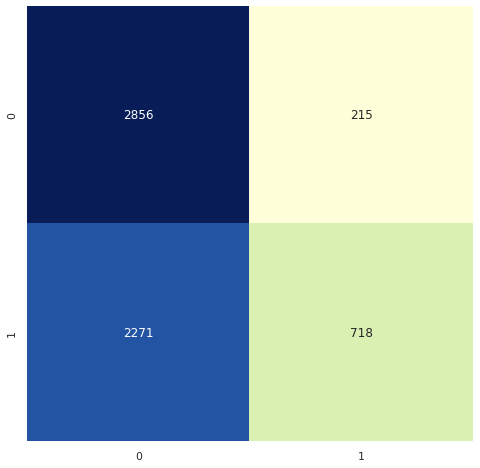

In [ ]:
# Running on the CYBER COP data
cyber_pred = best_model.predict(cyber_X)

# Performance metrics
accuracy = accuracy_score(cyber_Y, cyber_pred)
precision = precision_score(cyber_Y, cyber_pred)
recall = recall_score(cyber_Y, cyber_pred)
specificity = recall_score(cyber_Y, cyber_pred, pos_label = 0)

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision * 100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate...........: {(1-specificity) * 100:.4f}")
print("\n")

# Report the confusion matrix
cm = confusion_matrix(cyber_Y, cyber_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False, cmap = "YlGnBu");



Accuracy.........: 61.6633
Precision........: 49.2958
Recall...........: 9.2838
FP Rate...........: 5.9113




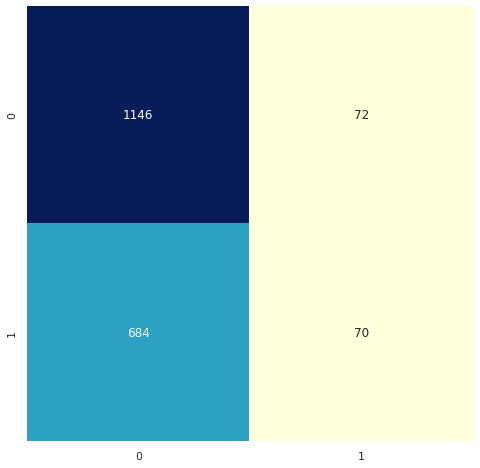

In [ ]:
# Running on the RUCHI BHATIA data
ruchi_pred = best_model.predict(ruchi_X)

# Performance metrics
accuracy = accuracy_score(ruchi_Y, ruchi_pred)
precision = precision_score(ruchi_Y, ruchi_pred)
recall = recall_score(ruchi_Y, ruchi_pred)
specificity = recall_score(ruchi_Y, ruchi_pred, pos_label = 0)

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision * 100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate...........: {(1-specificity) * 100:.4f}")
print("\n")

# Report the confusion matrix
cm = confusion_matrix(ruchi_Y, ruchi_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False, cmap = "YlGnBu");

This unfortunately did slightly worse, even though we tuned it

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Getting the predcitions
predictions = model.predict(X_test)



Accuracy.........: 99.4652
Precision........: 99.4946
Recall...........: 99.5261
FP Rate...........: 0.6079




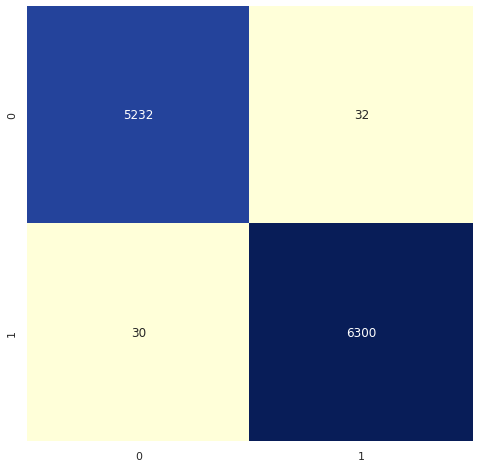

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

# Performance metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
specificity = recall_score(y_test, predictions, pos_label = 0)

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision * 100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate...........: {(1-specificity) * 100:.4f}")
print("\n")

# Report the confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False, cmap = "YlGnBu");



Accuracy.........: 51.1551
Precision........: 58.1921
Recall...........: 3.4460
FP Rate...........: 2.4096




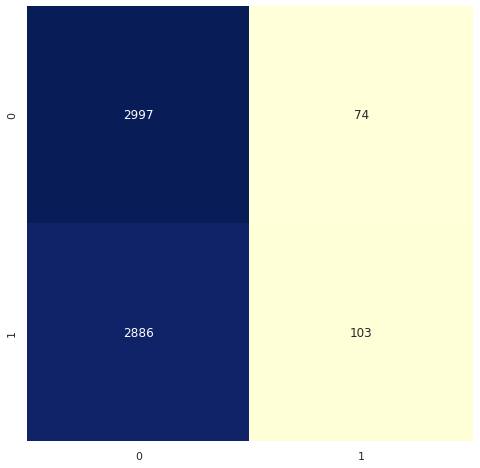

In [ ]:
# Running on the CYBER COP data
cyber_pred = model.predict(cyber_X)

# Performance metrics
accuracy = accuracy_score(cyber_Y, cyber_pred)
precision = precision_score(cyber_Y, cyber_pred)
recall = recall_score(cyber_Y, cyber_pred)
specificity = recall_score(cyber_Y, cyber_pred, pos_label = 0)

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision * 100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate...........: {(1-specificity) * 100:.4f}")
print("\n")

# Report the confusion matrix
cm = confusion_matrix(cyber_Y, cyber_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False, cmap = "YlGnBu");

Performs the worst, classifies almost everything as false. The data set I think is too quirky for this, but also the models don't seem to work



Accuracy.........: 62.3225
Precision........: 60.3774
Recall...........: 4.2440
FP Rate...........: 1.7241




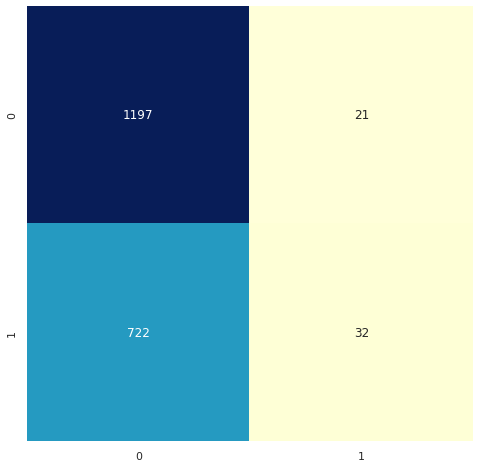

In [ ]:
# Running on the RUCHI BHATAI data
ruchi_pred = model.predict(ruchi_X)

# Performance metrics
accuracy = accuracy_score(ruchi_Y, ruchi_pred)
precision = precision_score(ruchi_Y, ruchi_pred)
recall = recall_score(ruchi_Y, ruchi_pred)
specificity = recall_score(ruchi_Y, ruchi_pred, pos_label = 0)

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision * 100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate...........: {(1-specificity) * 100:.4f}")
print("\n")

# Report the confusion matrix
cm = confusion_matrix(ruchi_Y, ruchi_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False, cmap = "YlGnBu");

##LSTM

In [ ]:
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

# For necessary padding
max_words = 1000
max_len = 150

#tokenizer = Tokenizer(num_words = max_words)
tokenizer = Tokenizer(lower = True, split = ' ', num_words = max_words)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_sequences_matrix = sequence.pad_sequences(X_train_sequences, maxlen = max_len)

In [ ]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding

def RNN():
    inputs = Input(name = 'inputs',shape = [max_len])
    layer = Embedding(max_words, 50, input_length = max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256, name = 'FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1, name = 'out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs = inputs, outputs = layer)
    return model

In [ ]:
model = RNN()
model.summary()
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

model.fit(X_train_sequences_matrix, y_train,
          epochs = 10,
          batch_size = 128,
          validation_split = 0.2,
          callbacks = [early_stop])

Epoch 1/10
170/170 [==============================] - 37s 199ms/step - loss: 0.1822 - accuracy: 0.9416 - val_loss: 0.0567 - val_accuracy: 0.9813
Epoch 2/10
170/170 [==============================] - 33s 195ms/step - loss: 0.0469 - accuracy: 0.9855 - val_loss: 0.0460 - val_accuracy: 0.9861
Epoch 3/10
170/170 [==============================] - 33s 195ms/step - loss: 0.0384 - accuracy: 0.9872 - val_loss: 0.0451 - val_accuracy: 0.9861
Epoch 4/10
170/170 [==============================] - 33s 194ms/step - loss: 0.0286 - accuracy: 0.9902 - val_loss: 0.0454 - val_accuracy: 0.9847
Epoch 5/10
170/170 [==============================] - 33s 196ms/step - loss: 0.0212 - accuracy: 0.9935 - val_loss: 0.0565 - val_accuracy: 0.9856


In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen = max_len)

In [ ]:
model.evaluate(test_sequences_matrix, y_test)

363/363 [==============================] - 8s 22ms/step - loss: 0.0583 - accuracy: 0.9854


[0.05832403153181076, 0.9854235053062439]

###Cyber Cop Data

In [ ]:
cyber_sequences = tokenizer.texts_to_sequences(cyber_X)
cyber_sequences_matrix = sequence.pad_sequences(cyber_sequences, maxlen = max_len)
model.evaluate(cyber_sequences_matrix, cyber_Y)

190/190 [==============================] - 4s 23ms/step - loss: 2.4313 - accuracy: 0.5941


[2.4313032627105713, 0.594059407711029]

###Ruchi Data

In [ ]:
ruchi_sequences = tokenizer.texts_to_sequences(ruchi_X)
ruchi_sequences_matrix = sequence.pad_sequences(ruchi_sequences, maxlen = max_len)
model.evaluate(ruchi_sequences_matrix, ruchi_Y)

62/62 [==============================] - 1s 23ms/step - loss: 2.6490 - accuracy: 0.5877


[2.6489779949188232, 0.5877282023429871]

##Logistic Regression

In [ ]:
# Create token pattern
import re

re_tok = re.compile('[^a-zA-Z]')
def tokenize(s): 
    return re_tok.sub(' ', s).split()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(tokenizer = tokenize)

In [ ]:
# Transforms text in X to a bag of words representation
tf_train = count_vect.fit_transform(X_train)
tf_test = count_vect.transform(X_test)

In [ ]:
# Get full vocabulary from X
vocab = count_vect.get_feature_names()
len(vocab)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


97190

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0, solver = 'liblinear', multi_class = 'ovr').fit(tf_train, y_train)

In [ ]:
# Get probabilities for positive class and general predcitions
probs = model.predict_proba(tf_test)[:,1]
predictions = model.predict(tf_test)



Accuracy.........: 99.5084
Precision........: 99.3548
Recall...........: 99.7472
FP Rate...........: 0.7789




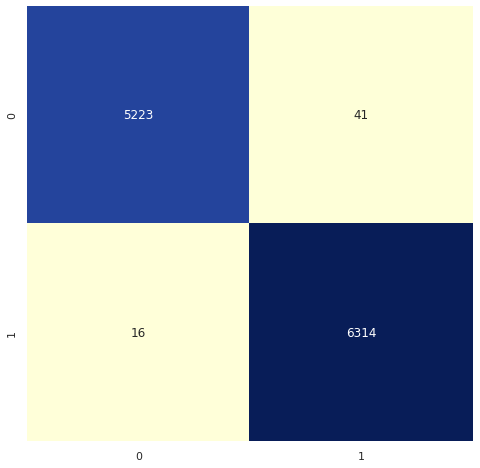

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

# Performance metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
specificity = recall_score(y_test, predictions, pos_label = 0)

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision * 100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate...........: {(1-specificity) * 100:.4f}")
print("\n")

# Report the confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False, cmap = "YlGnBu");



Accuracy.........: 56.4521
Precision........: 77.6899
Recall...........: 16.4269
FP Rate...........: 4.5913




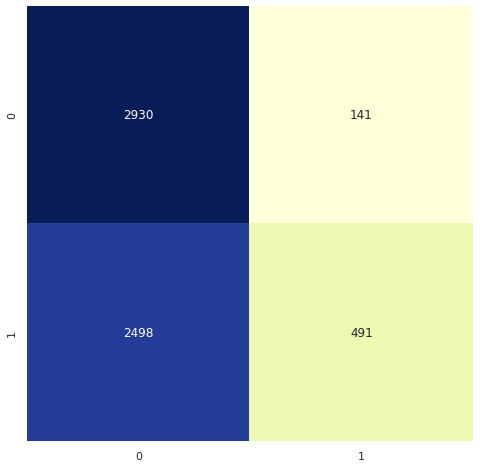

In [ ]:
cyber_test = count_vect.transform(cyber_X)
new_pred1 = model.predict(cyber_test)

# Performance metrics
accuracy = accuracy_score(cyber_Y, new_pred1)
precision = precision_score(cyber_Y, new_pred1)
recall = recall_score(cyber_Y, new_pred1)
specificity = recall_score(cyber_Y, new_pred1, pos_label = 0)

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision * 100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate...........: {(1-specificity) * 100:.4f}")
print("\n")

# Report the confusion matrix
cm = confusion_matrix(cyber_Y, new_pred1)
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False, cmap = "YlGnBu");



Accuracy.........: 62.4746
Precision........: 56.0345
Recall...........: 8.6207
FP Rate...........: 4.1872




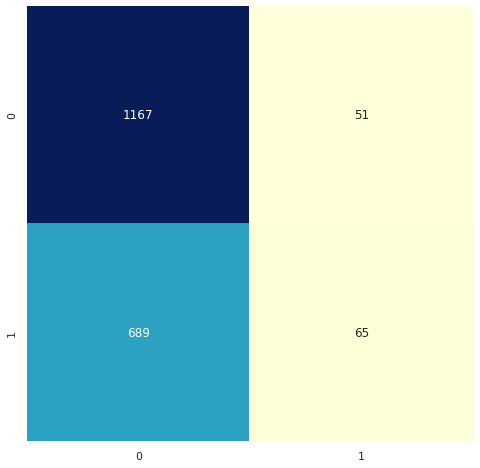

In [ ]:
ruchi_test = count_vect.transform(ruchi_X)
new_pred2 = model.predict(ruchi_test)

# Performance metrics
accuracy = accuracy_score(ruchi_Y, new_pred2)
precision = precision_score(ruchi_Y, new_pred2)
recall = recall_score(ruchi_Y, new_pred2)
specificity = recall_score(ruchi_Y, new_pred2, pos_label = 0)

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision * 100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate...........: {(1-specificity) * 100:.4f}")
print("\n")

# Report the confusion matrix
cm = confusion_matrix(ruchi_Y, new_pred2)
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False, cmap = "YlGnBu");